<a href="https://www.kaggle.com/code/potalatarun/implementation-fnn?scriptVersionId=207519331" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

california = datasets.fetch_california_housing()
X_california = california["data"]
y_california = california["target"]

* Neural networks in Keras can be fit through one of two APIs: the sequential or the functional API. For the type of models we were working, either approach works.
* 1. The Sequential API

#### Fitting a network with the keras sequential API can be broken down into four steps:
##### * Instantiate Model
##### * Add layers
##### * Compile model (and summarize)
##### * Fit model

##### * We first instantiate the network using tf.keras.models.Sequential()
##### * Next, add layers to the network, specifically, we have to add any hidden layers we like followed by single output layer.
##### * We will use dense layers in this notebook. A dense layer is one in which each neuron is a function of all the other neurons in the previous layer.
##### * We identify the number of neurons in the layer with the "units" argument and the activation function applied to the layer with the "activation" argument.
##### * For the First layer only, we must also identify the input_shape, or the number of neurons in the input layer.
##### * If our predictors are of length D, the input shape will be ( D, ) [which is the shape of a single observation, as we can see with x[0].shape]

##### * The next step is to compile the model.
##### * Compiling determines the configuration of the model;
##### * * We specify the optimizer and loss function to be used as well as any metrics we would like to monitor.
##### * * After compiling, we can also preview our model using model.summary()

##### * Finally we fit the model.
##### * Here is where we actually provide the training data.
##### * Two other important arguments are "epochs and batch_size".
##### * Models in keras are fit with "mini-bactch gradient descent", in which samples of the training data are looped through and individually used to calculate and update gradients.
##### * "batch_size" determines the size of the these samples, and "epochs" determines how many times the gradient is calculated for each sample.

In [3]:
## Instantiate
model = tf.keras.models.Sequential(name = 'Sequential_Model')

## Add Layers
model.add(tf.keras.layers.Dense(
    units = 8,
    activation = 'relu',
    input_shape = (X_california.shape[1],),
    name='hidden'
))
model.add(tf.keras.layers.Dense(
    units = 1,
    activation = 'linear',
    name = 'output'
))

## Compile (and summarize)
model.compile(optimizer = 'adam', loss='mse')
print(model.summary())

## Fit
model.fit(X_california,y_california,epochs=10, batch_size=1, validation_split=0.2, verbose=0)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Sequential_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

None


I0000 00:00:1731661458.267015      65 service.cc:145] XLA service 0x7fd328006c90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731661458.267066      65 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1731661458.956963      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [4]:
input_shape_fake = (X_california.shape[1], )
print(input_shape_fake)

(8,)


In [5]:
## Create predictions
yhat_california = model.predict(X_california)

645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


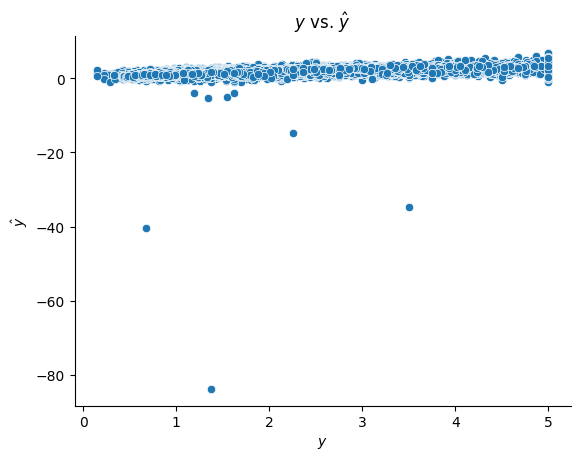

In [6]:
## plot 
fig, ax = plt.subplots()
sns.scatterplot(x = y_california,y = yhat_california[:,0])
ax.set(xlabel = r'$y$',ylabel=r'$\hat{y}$',title=r'$y$ vs. $\hat{y}$')
sns.despine()

### 2. The Functional API

##### * Fitting models with the Functional API can again be broken into four steps,
##### * 1. Define Layers
##### * 2. Define Model
##### * 3. Compile model(and summarize)
##### * 4. Fit Model

##### * We start by adding an input layer using tf.keras.Input().
##### * Next we add one or more hidden layers using tf.keras.layers.Dense().
##### * To be noted that, in this approach we link layers directly. For instance, we indicate that the hidden layer below follows the inputs layer by adding (inputs) to the end of its definition.

##### * After creating the layers, we can define our model.
##### * We can do this by using tf.keras.Model() and identifying the input and output layers.
##### * Finally, we compile and fit our model as in the previous sequential API.

In [7]:
## Define layers 
inputs = tf.keras.Input(shape = (X_california.shape[1],), name = 'input')
hidden = tf.keras.layers.Dense(8, activation = 'relu', name="first_hidden" )(inputs)
outputs = tf.keras.layers.Dense(1, activation = 'linear', name = 'output')(hidden)

## Model
model = tf.keras.Model(inputs = inputs, outputs = outputs, name="Functional_Model")

## Compile (and summarize)
model.compile(optimizer = "adam", loss="mse")
print(model.summary())

## Fit
%time
%prun model.fit(X_california,y_california,epochs=100,batch_size =10, validation_split=0.2, verbose=0)

Model: "Functional_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_hidden (Dense)            │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

None
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.63 µs
 

645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


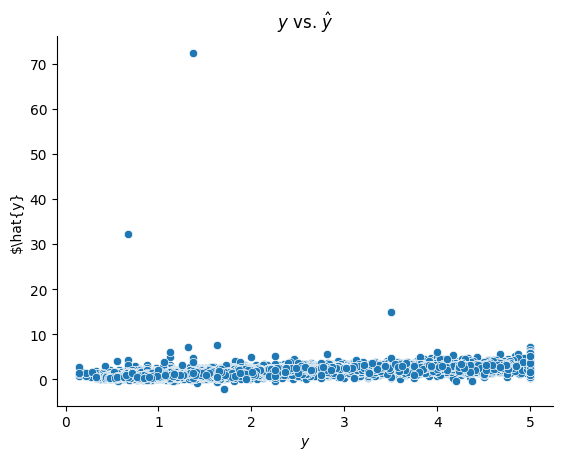

In [8]:
## create predictions
yhat_california = model.predict(X_california)[:,0]

#plot
fig, ax = plt.subplots()
sns.scatterplot(x=y_california,y=yhat_california,ax=ax)
ax.set(xlabel=r'$y$',ylabel=r'$\hat{y}',title=r'$y$ vs. $\hat{y}$')
sns.despine()